## References
Keeping track of references here and will move to the bottom of the notebook when project is near completion. 

Reference links are throughout the notebook. The are also displayed here with more information:

* [Powerproduction dataset url link](https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv)
* Ian Mc Loughlin course material
* [Pandas](https://pandas.pydata.org/)  is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
  * [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
* [NumPy](https://numpy.org/) is a Python library used for working with arrays.
* [investopedia](https://www.investopedia.com/terms/s/standarddeviation.asp) simplify complex financial information and decisions for their readers, it is a great source for information in simplier terms that are easier to comprehend. 
* [stats](https://online.stat.psu.edu/stat462/node/91/) is an online course materials website. There are lots of examples, notes, and lecture materials on the website, I particularly benefited from the section on simple linear regression I referenced here. 
* [real python](https://realpython.com/) is a great source where you can learn all things Python from the ground up. Everything from the absolute basics of Python, to web development and web scraping, to data visualization, and beyond, I used images from the section on linear regression and benefited from the explantions. 
  * [real python/linear-regression](https://realpython.com/linear-regression-in-python/)
* [towardsdatascience.com](https://towardsdatascience.com/) is a a Medium publication sharing concepts, ideas, and codes.
  * [Medium](https://medium.com/) is an open platform where readers find dynamic thinking, and where expert and undiscovered voices can share their writing on any topic.
  * [towardsdatascience om simple linear regression](https://towardsdatascience.com/simple-linear-regression-model-using-python-machine-learning-eab7924d18b4)
  * [towards data science interpreting coefficients](https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1)
  * [towards data science linear regression](https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606)
* [w3schools](https://www.w3schools.com/) is a school for web developers, covering all the aspects of web development. 
   * [w3 schools on reshaping arrays](https://www.w3schools.com/python/numpy_array_reshape.asp)  
   * [w3 schools regression](https://www.w3schools.com/python/python_ml_linear_regression.asp)
* [scikik-learn](https://scikit-learn.org/stable/) have simple and efficient tools for predictive data analysis.
   * [sklearn.linear.model.linearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) 
   * [sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
   * [sklearn on model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html)
* [machine learning mastery](https://machinelearningmastery.com/about/) was created by Jason Brownlee, he started the community because he wants to help developers get started and get good at applied machine learning. They provide courses but also have a great blog that often shows up in my google searches and have great information. 
   * [machine learning mastery on linear regression](https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python/)
* [sthda.com](http://www.sthda.com/english/articles/40-regression-analysis/167-simple-linear-regression-in-r/) is a web site for statistical data analysis and data visualization using R software. Although I am using Python programming language, a lot can also be learned from blog posts on the R language. In particular this blog post about implementing simple linear regression in R. 
* [ncbi.nlm](https://www.ncbi.nlm.nih.gov/home/about/)The National Center for Biotechnology Information (NCBI) is part of the United States National Library of Medicine (NLM), a branch of the National Institutes of Health (NIH).
   * [Statistical notes for clinical researchers](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6103548/#:~:text=SSR%20is%20the%20additional%20amount,squares%20of%20errors%20(SSE).), these notes included simple linear regression 2 – evaluation of regression line, it was good to see as an example of an evaluation. 
* [askpython.com](https://www.askpython.com/python) is full of helpful tutorials in python
   * [askPython linear regression examples](https://www.askpython.com/python/examples/linear-regression-in-python)
* [blog.google](https://blog.google/technology/ai/machine-learning-can-boost-value-wind-energy/). This blog post on using machine learning to boost wind energy value was very interesting. I have used and referenced two images from the blog post. The wind turbine image at the start of the project and an image about boosting wind energy value with machine learning which is  relevant to the concepts of this project. 
* [wikipedia](https://en.wikipedia.org/wiki/Wikipedia) is an online free-content encyclopedia project helping to create a world in which everyone can freely share in the sum of all knowledge. It is supported by the Wikimedia Foundation and based on a model of freely editable content. It is a great source for getting a better understanding on concepts you already sort of have an idea aboout. There have been concearns that Wikipedia is not a credible source of information because of the open editing that can be done by anyone but we don't have many trolls editing posts about math and python so within the coding community it is a useful resource. 
   * [wikipedia mse](https://en.wikipedia.org/wiki/Mean_squared_error)

## Project 2020


### GMIT Fundamentals of Data Analysis
***
### Student: Aine Nic Dhonnacha
***
### Email: G00259400@gmit.ie
***

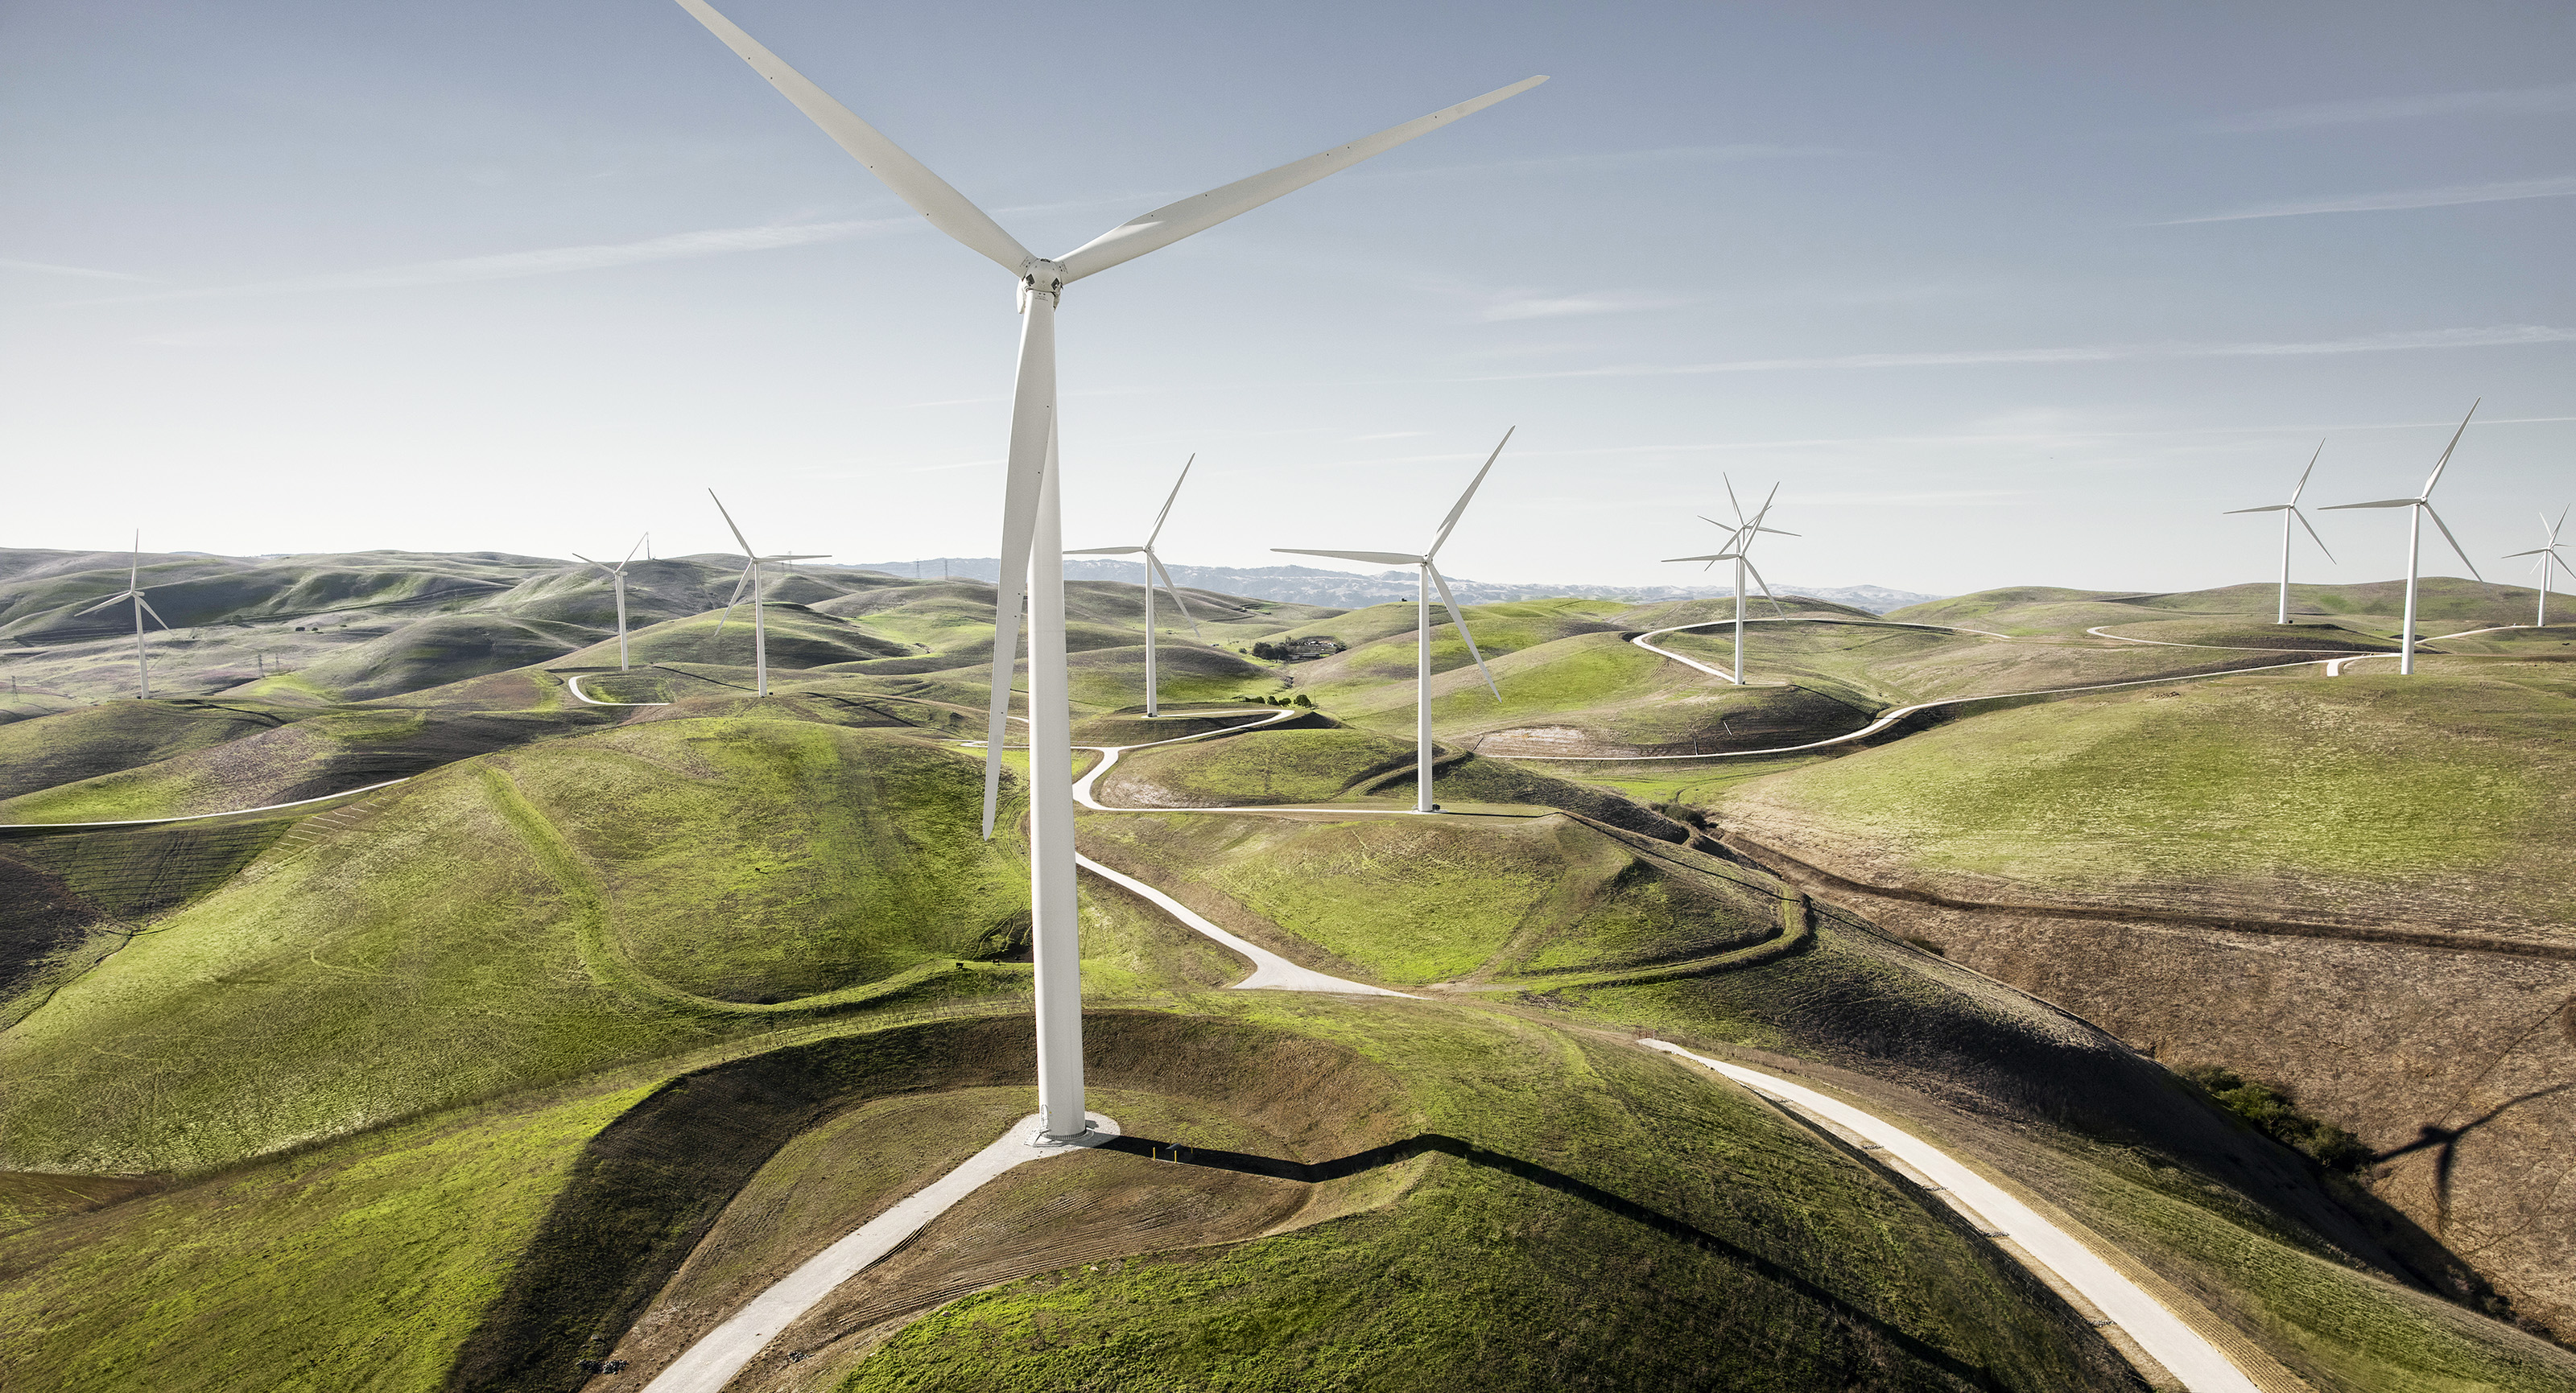

[image from blog.google](https://blog.google/technology/ai/machine-learning-can-boost-value-wind-energy/)

This project performs and explains <b>simple linear regression</b> using Python on the powerproduction dataset below. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

###### The data set url "https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv"
   The dataset was provided by Lecturer Ian Mc Loughlin on moodle. 
   
Regression is the term used when you are trying to find the relationship between variables. 

For this project; wind turbine power output and wind speed value are the variables. I must perform simple linear regression on the dataset while explaining my regression and write an analysis of its accuracy. 

To enhance my submission, I will compare Simple linear regression to other types of regression on this dataset. 

<div class="alert alert-info"> <b> Notes about dataset taken from lecture video:</b> The idea of the dataset is that at a certain wind speed the wind turbine produces that amont of power. Companies producing electricity, typically have to sell it ahead of time which is why power predictions are so important. Being able to predict the amount of electricity produced is a big challenge for wind turbines as they rely on the wind speed and that is subject to change. They can try use forecasting data but the speed values are always going to be out a little bit. On a wind farm it can be challenging to predict how much electricity you are going to generate tomorrow. 
Machine learning is heavily used in that industry to try and make accurate predictions and thats where the dataset comes from. At given wind speed how much electricity it produces. ( Ian McLoughlin lecture videos) </div>

Regression analysis is one of the most important fields in statistics and machine learning. There are many regression methods available. Linear regression is one of them.[(real python)](https://realpython.com/linear-regression-in-python/)
The image below is from an interesting blog post on google about how machine learning can boost the value of wind energy.[(blog.google)](https://blog.google/technology/ai/machine-learning-can-boost-value-wind-energy/)
In the article published on Feb 26, 2019, they said that they cannot estimate the variabiliy of the wind but their early results suggest that they can use machine learning to make wind power sufficently more predictable and valuable. Machine learning can help wind farm operators make smarter, faster and more data-driven assessment of how their power output can meet electricity demand. 


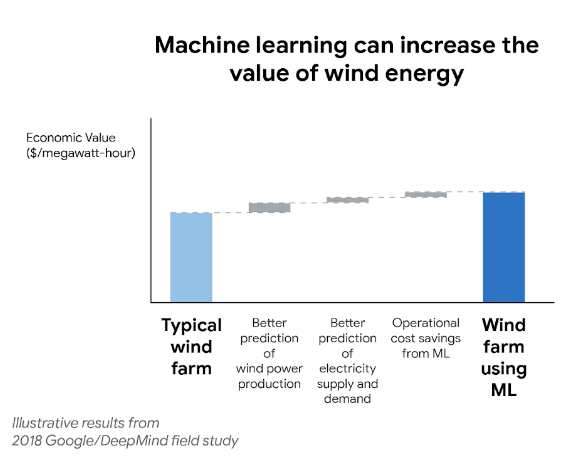

[Results from DeepMind application of machine learning to Google’s wind power](https://blog.google/technology/ai/machine-learning-can-boost-value-wind-energy/)

<b> Import Python libraries: </b>

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (14,8)
import numpy as np

#importing libraries for regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math


<b> Using Pandas to read the dataset url and call it df for the code: </b>

In [2]:
# read the dataset url using pandas:
url ="https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv"
#defining dataset
df = pd.read_csv(url)


In [3]:
# Having a look at the dataset
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


<b> Thoughts on dataset: </b>
My initial assumption about the dataset was that the higher the speed the wind turbine accumulates, the more power that would be outputed which would produce a straight line regression. I did some research to confirm this; 
<div class="alert alert-success">
"Wind speed largely determines the amount of electricity generated by a turbine. Higher wind speeds generate more power because stronger winds allow the blades to rotate faster. Faster rotation translates to more mechanical power and more electrical power from the generator.Turbines are designed to operate within a specific range of wind speeds. The limits of the range are known as the cut-in speed and cut-out speed. The cut-in speed is the point at which the wind turbine is able to generate power. Between the cut-in speed and the rated speed, where the maximum output is reached, the power output will increase cubically with wind speed. For example, if wind speed doubles, the power output will increase 8 times. This cubic relationship is what makes wind speed such an important factor for wind power. This cubic dependence does cut out at the rated wind speed. The cubic dependence is during the speeds below 15 m/s (54 kph).

The cut-out speed is the point at which the turbine must be shut down to avoid damage to the equipment. The cut-in and cut-out speeds are related to the turbine design and size and are decided on prior to construction."Apr 28, 2020
</div>

[(energy education encyclopedia)](https://energyeducation.ca/encyclopedia/Wind_power#:~:text=Wind%20speed%20largely%20determines%20the,electrical%20power%20from%20the%20generator.)


<b>Seeing the end of the dataset looking for cut off point in the wind speed/ power output dataset:</b>

In [4]:
# show tail of dataset
df.tail()

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


After reading the above information from [energy education encyclopedia](https://energyeducation.ca/encyclopedia/Wind_power#:~:text=Wind%20speed%20largely%20determines%20the,electrical%20power%20from%20the%20generator.) I used df.tail to see the end of the dataset as I wanted to see if this dataset has the cut off point it talked about. I can see from the 0.0 power output, when the wind speed reaches a certain speed it stops producing a power output. 

<b>Simple Linear Regression</b> is a type of regression analysis where the number of independent variables is one and there is a linear relationship between the independent(x) and dependent(y) variable. [(towards data science)](https://towardsdatascience.com/introduction-to-machine-learning-algorithms-linear-regression-14c4e325882a#:~:text=Simple%20linear%20regression%20is%20a,the%20best%20fit%20straight%20line.)
I found many explanations on this and have attached screenshots of two of my favourite below. The first is from [stats.psu](https://online.stat.psu.edu/stat462/node/91/), I like the simplicity of this explanation which tells us exactly what x and y are. The next is from [real python](https://realpython.com/linear-regression-in-python/). I like this explanation so much I have also included it below under the diagram. 



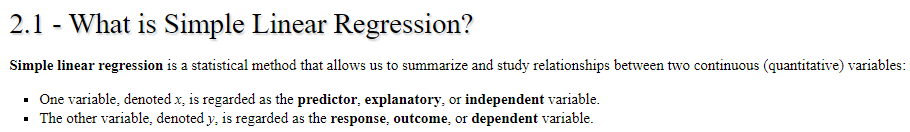
[image from stats.psu](https://online.stat.psu.edu/stat462/node/91/)




 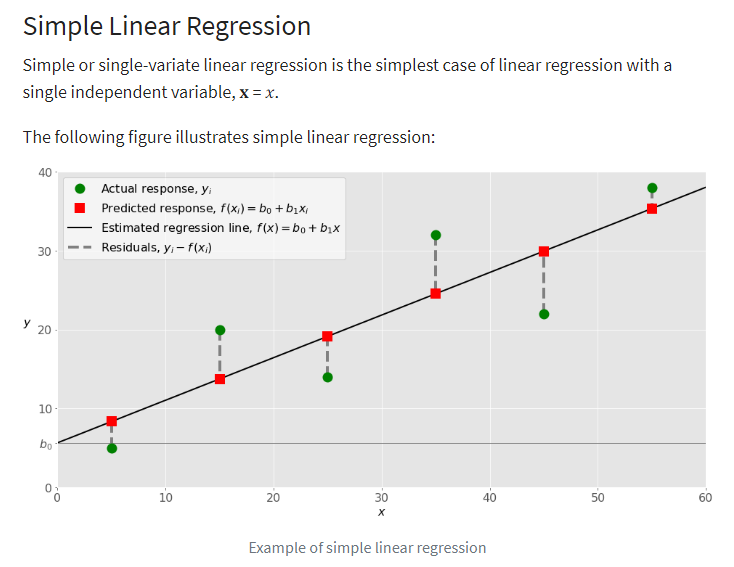[ image from real python](https://realpython.com/linear-regression-in-python/)

<div class="alert alert-success">
  <strong>Explanation of image from real python: </strong> "When implementing simple linear regression, you typically start with a given set of input-output (𝑥-𝑦) pairs (green circles). These pairs are your observations. For example, the leftmost observation (green circle) has the input 𝑥 = 5 and the actual output (response) 𝑦 = 5. The next one has 𝑥 = 15 and 𝑦 = 20, and so on.

The estimated regression function (black line) has the equation 𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥. Your goal is to calculate the optimal values of the predicted weights 𝑏₀ and 𝑏₁ that minimize SSR and determine the estimated regression function. The value of 𝑏₀, also called the intercept, shows the point where the estimated regression line crosses the 𝑦 axis. It is the value of the estimated response 𝑓(𝑥) for 𝑥 = 0. The value of 𝑏₁ determines the slope of the estimated regression line.

The predicted responses (red squares) are the points on the regression line that correspond to the input values. For example, for the input 𝑥 = 5, the predicted response is 𝑓(5) = 8.33 (represented with the leftmost red square).

The residuals (vertical dashed gray lines) can be calculated as 𝑦ᵢ - 𝑓(𝐱ᵢ) = 𝑦ᵢ - 𝑏₀ - 𝑏₁𝑥ᵢ for 𝑖 = 1, …, 𝑛. They are the distances between the green circles and red squares. When you implement linear regression, you are actually trying to minimize these distances and make the red squares as close to the predefined green circles as possible." </div> 

[(real python)](https://realpython.com/linear-regression-in-python/)

Pandas has many built in functions that can assist in analysing dataframes such as those used below; 
[(pandas documentation)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [5]:
# information on dataset
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


(500, 2)

In [6]:
# find the mean
df.mean()


speed    12.590398
power    48.014584
dtype: float64

In [7]:
# for more detail, describe the data set
df.describe()


,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


The Std (standard deviation) and the 50% gives an indiction how far away your values were from the mean.  If the data points are further from the mean, there is a higher deviation within the data set; the more spread out the data, the higher the standard deviation. [investopedia](https://www.investopedia.com/terms/s/standarddeviation.asp)

We can use [seaborn](https://seaborn.pydata.org/) to create plots that can help visualise the data on the datasets as demonstrated in the next few cells; 

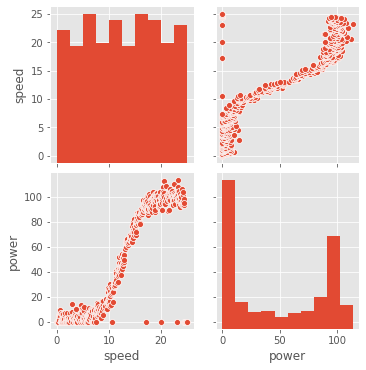

In [9]:
# pairplot of dataset using seaborn
sns.pairplot(df);

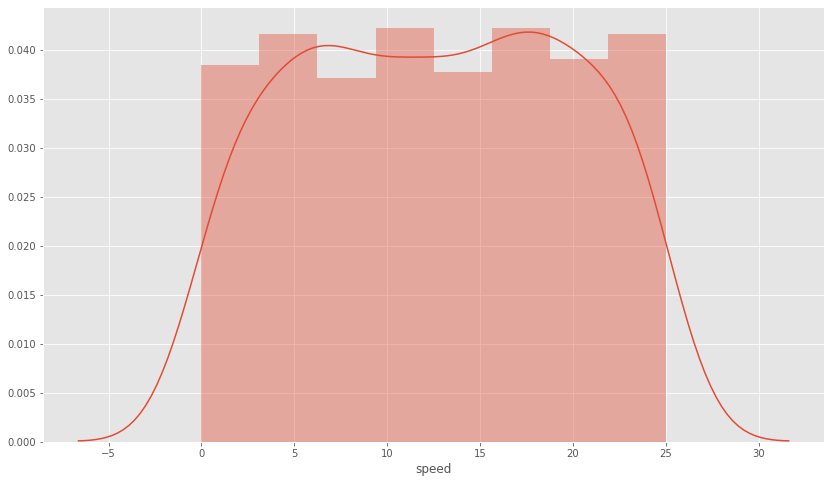

In [10]:
# speed distplot
sns.distplot(df["speed"], kde=True);

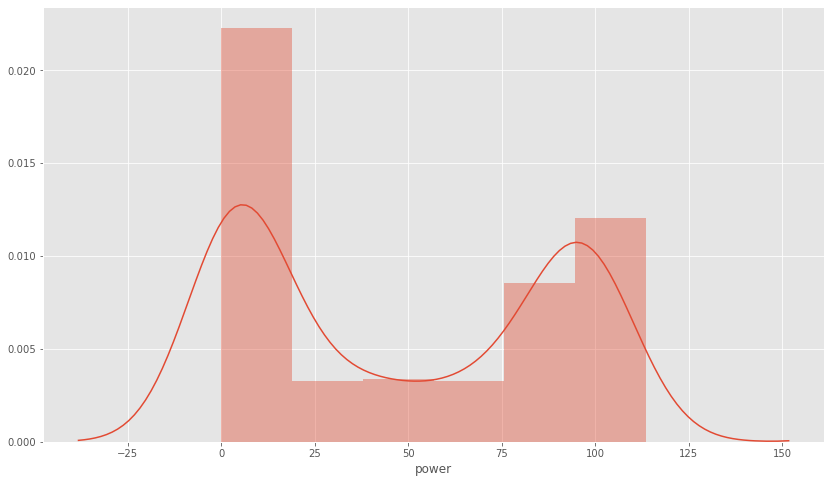

In [11]:
# power distplot
sns.distplot(df["power"], kde=True);

[seaborn.scarrerplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) Draws a scatter plot with possibility of several semantic groupings.

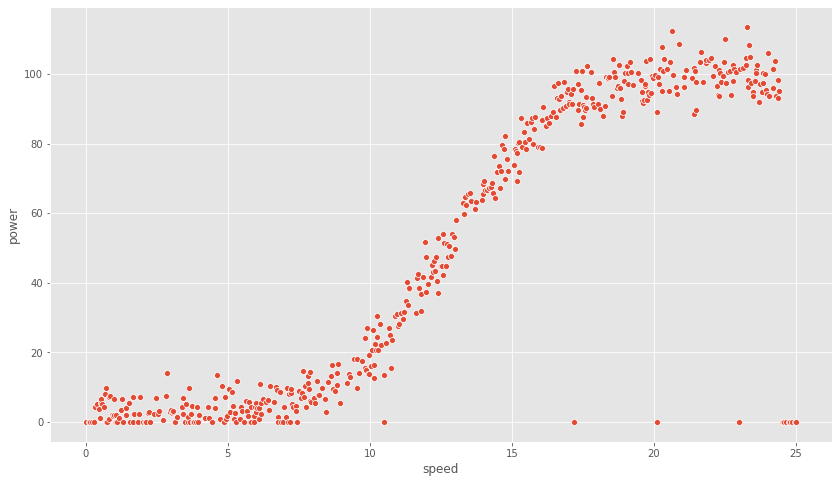

In [12]:
#scatterplot of data using seaborn
sns.scatterplot(data=df, x="speed", y="power");

[seaborn.regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html) Plots data and a linear regression model fit.

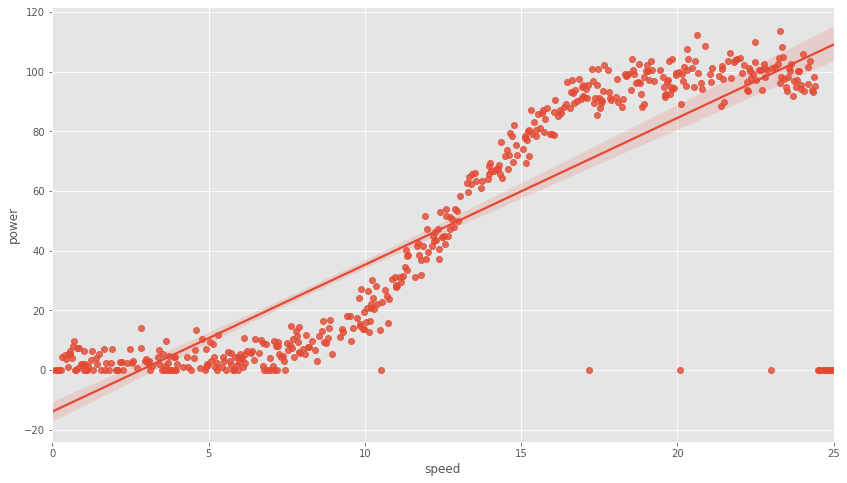

In [13]:
# Scatter and fit line
sns.regplot(x="speed", y="power", data=df);


"The inputs (regressors, x) and output (predictor, 𝑦) should be arrays (the instances of the class numpy.ndarray) or similar objects." [real python](https://realpython.com/linear-regression-in-python/)
 
speed(x)is our regressor, power(y) is our predictor.
 

The array needs to be reshaped because the indexes are not required, just the actual values. we want one column 1 and the -1 means python is going to figure out the value. [w3schools](https://www.w3schools.com/python/numpy_array_reshape.asp)

In [14]:
# selects the column headings in this case 'speed' and 'power'
speed = df['speed']
power = df['power']

# Numpy can be used to create arrays from dataFrames.
# passing -1 as the value, and numpy will calculate the value of the reshape(w3 schools reference above)
x = np.array(speed).reshape(-1, 1)
y = np.array(power).reshape(-1, 1)

[sklearn](https://scikit-learn.org/stable/) is used to build machine learning models ,I used its linear regression model. I have attached and image from the website below with its explanation that [skleaen.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) fits a model with [coefficents](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html).  

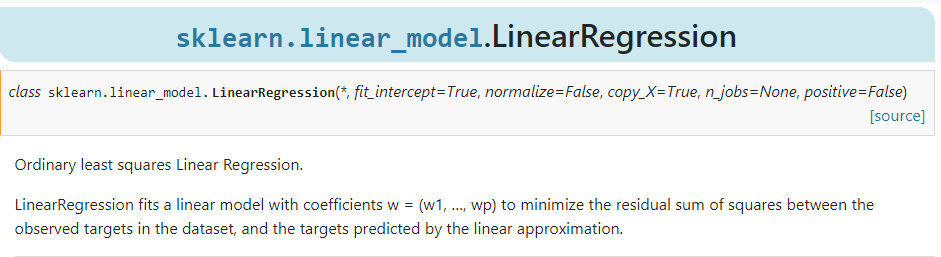

[image from sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[sklearn.linear.model.linearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) can be used to perform linear and polynomial regression and make predictions.

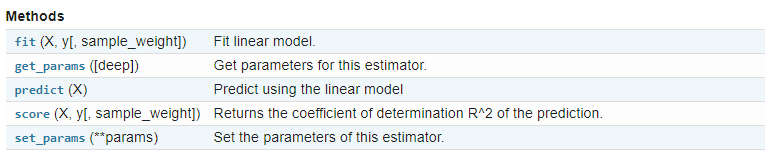

[image from sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [15]:
#display x
#x

In [16]:
#display y
#y

[real python](https://realpython.com/linear-regression-in-python/)



The MSE is a measure of the quality of an estimator—it is always non-negative, and values closer to zero are better.[wikipedia](https://en.wikipedia.org/wiki/Mean_squared_error)

R squared value is used as a general quality indicator of your curve fit. 


In [17]:
# creates the variable model as the instance of LinearRegression. 
#.fit() calculates the optimal values of the weights using the existing input and output(x and y) as the arguments. 
model = LinearRegression().fit(x, y)
#R measures how strong of a linear relationship between the two variables
r = model.score(x, y)
mse = mean_squared_error(x, y)
print("MSE: ", math.sqrt(mse))
print('R squared value:', r)

MSE:  50.22850830158109
R squared value: 0.7289360258564073


I know there is something off with my prediction with the 50 mean square error, as far as I am aware I need a number close to 0 and 1 here, 50 is very high. 

 The line for a simple linear regression model can be written as:   <div class="well well-sm">y = b0 + b1 * x </div> [machine learning mastery](https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python/) 
 where b0 and b1 are the coefficients we must estimate from the training data. b0 is the intercept of the regression line; that is the predicted value when x = 0. b1 is the slope of the regression line.[sthda.com](http://www.sthda.com/english/articles/40-regression-analysis/167-simple-linear-regression-in-r/)

".intercept_ is a one-dimensional array with the single element 𝑏₀, and .coef_ is a two-dimensional array with the single element 𝑏₁."[real python](https://realpython.com/linear-regression-in-python/)

In [18]:
#this is the b0 
print(model.intercept_[0])
#this is the b1
print(model.coef_[0])


-13.899902630519634
[4.91759567]


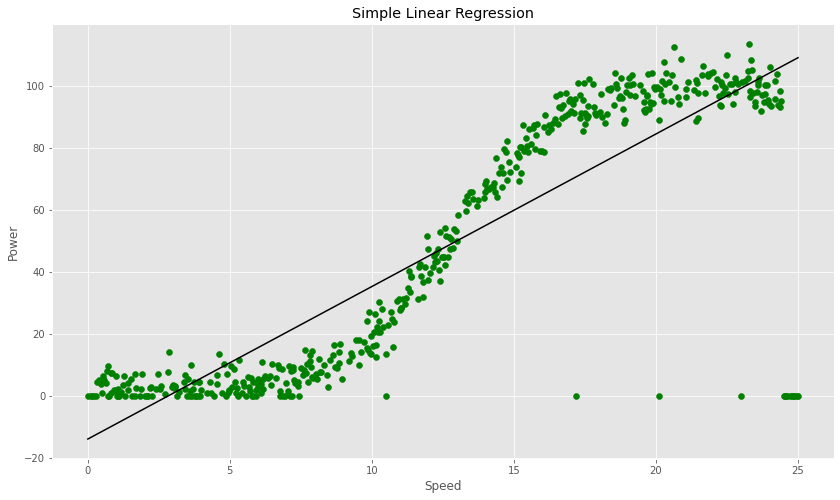

In [19]:
#visualise the dataset with the fitted model
plt.scatter(x, y,color='green' )
plt.plot(x, model.predict(x), color = 'black')
plt.title("Simple Linear Regression")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.show()

Note for myself to invesitgate: At low wind speeds the model predicts negative power values which is not supported by the data.

# For future Analysis 
## Why did I fit a straight line to this dataset? was that a good idea? Am I over estimating or under estimating at different points? 
note: This is about the concepts involved and how I analysis and weather I have a good fit or not. 